In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats


In [77]:
full_ld_df = pd.read_csv("data\processed_loan_data.csv", low_memory = True)
full_ld_df.dtypes

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\kevin\AppData\Local\Temp\ipykernel_28732\1181240237.py:1: SyntaxWarning: invalid escape sequence '\p'
  full_ld_df = pd.read_csv("data\processed_loan_data.csv", low_memory = True)


BORROWER_NAME            object
STATE                    object
ZIP                       int64
BANK                     object
BANK_STATE               object
INDUSTRY_ID               int64
APPROVAL_DATE            object
APPROVAL_YEAR             int64
TERM                      int64
EMPLOYEE_COUNT            int64
IS_NEW                     bool
JOBS_CREATED_COUNT        int64
JOBS_RETAINED_COUNT       int64
FRANCHISE_CODE            int64
IS_URBAN                   bool
IS_REVOLVER                bool
IS_LOW_DOC                 bool
DEFAULT_DATE             object
DISBURSEMENT_DATE        object
DISBURSEMENT_AMOUNT     float64
LOAN_STATUS                bool
CHARGE_OFF_AMOUNT       float64
LOAN_AMOUNT             float64
SBA_APPROVED_AMOUNT     float64
TREASURY_YIELD          float64
CPI_INDEX               float64
GDP                     float64
MORTGAGE_30_US_FIXED    float64
UNRATE                  float64
INDPRO_INDEX            float64
UMCSENT_INDEX           float64
CSUSHPIN

In [ ]:
default_df = full_ld_df.loc[~full_ld_df['LOAN_STATUS']]
default_df.reset_index(inplace=True, drop=True)
default_df.head(10000000000)

,BORROWER_NAME,STATE,ZIP,BANK,BANK_STATE,INDUSTRY_ID,APPROVAL_DATE,APPROVAL_YEAR,TERM,EMPLOYEE_COUNT,...,GDP,MORTGAGE_30_US_FIXED,UNRATE,INDPRO_INDEX,UMCSENT_INDEX,CSUSHPINSA_INDEX,CP_INDEX,FEDFUNDS_RATE,EXPOSURE,PERCENTAGE_EXPOSURE
0,BALOONS AND BEARS,CA,94598,WELLS FARGO BANK NATL ASSOC,SD,453220,1996-01-11,1996,84,1,...,8073.12175,7.806154,5.408333,75.165983,93.608333,82.808500,541.42850,5.298333,9240.0,0.200000
1,"TAHOMA COMPANIES, INC C/O SBA",UT,84138,STATE BANK OF SOUTHERN UTAH,UT,541330,1996-07-02,1996,109,11,...,8073.12175,7.806154,5.408333,75.165983,93.608333,82.808500,541.42850,5.298333,20000.0,0.200000
2,CABALLO LAKE RV PARK,NM,87935,BANK OF THE SOUTHWEST,NM,721211,1996-08-29,1996,213,2,...,8073.12175,7.806154,5.408333,75.165983,93.608333,82.808500,541.42850,5.298333,28530.0,0.245040
3,"TUBS TO GO SPA MFG., LLP",MT,59635,VALLEY BK OF HELENA A DIVISION,MT,326191,1997-01-29,1997,107,2,...,8577.55250,7.598846,4.941667,80.569050,103.216667,85.317417,592.26625,5.460000,42500.0,0.250000
4,"SWEET CEDAR STUDIO, LLC",MT,59725,WELLS FARGO BANK NATL ASSOC,SD,512110,1997-03-14,1997,7,1,...,8577.55250,7.598846,4.941667,80.569050,103.216667,85.317417,592.26625,5.460000,4000.0,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88492,ALPHA TRIM INC,CA,90058,COMPASS BANK,AL,448150,2013-10-23,2014,76,4,...,17608.13825,4.168868,6.158333,102.305642,84.125000,164.674667,1947.36300,0.089167,17500.0,0.500000
88493,"E Smokey Treats, LLC",CA,95062,JPMORGAN CHASE BANK NATL ASSOC,IL,454111,2013-10-29,2014,80,8,...,17608.13825,4.168868,6.158333,102.305642,84.125000,164.674667,1947.36300,0.089167,12500.0,0.500000
88494,"HEMMING TRANSPORT AND TOWING,",CA,94015,WELLS FARGO BANK NATL ASSOC,SD,488410,2013-11-06,2014,77,0,...,17608.13825,4.168868,6.158333,102.305642,84.125000,164.674667,1947.36300,0.089167,11281.0,0.692894
88495,MOUNTAIN ROCK FASHION,CA,91401,WELLS FARGO BANK NATL ASSOC,SD,448140,2013-11-14,2014,78,5,...,17608.13825,4.168868,6.158333,102.305642,84.125000,164.674667,1947.36300,0.089167,12500.0,0.500000


C:\Users\kevin\AppData\Local\Temp\ipykernel_28732\3228507350.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['IS_URBAN'] = default_df['IS_URBAN'].astype(int)
C:\Users\kevin\AppData\Local\Temp\ipykernel_28732\3228507350.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['IS_LOW_DOC'] = default_df['IS_LOW_DOC'].astype(int)


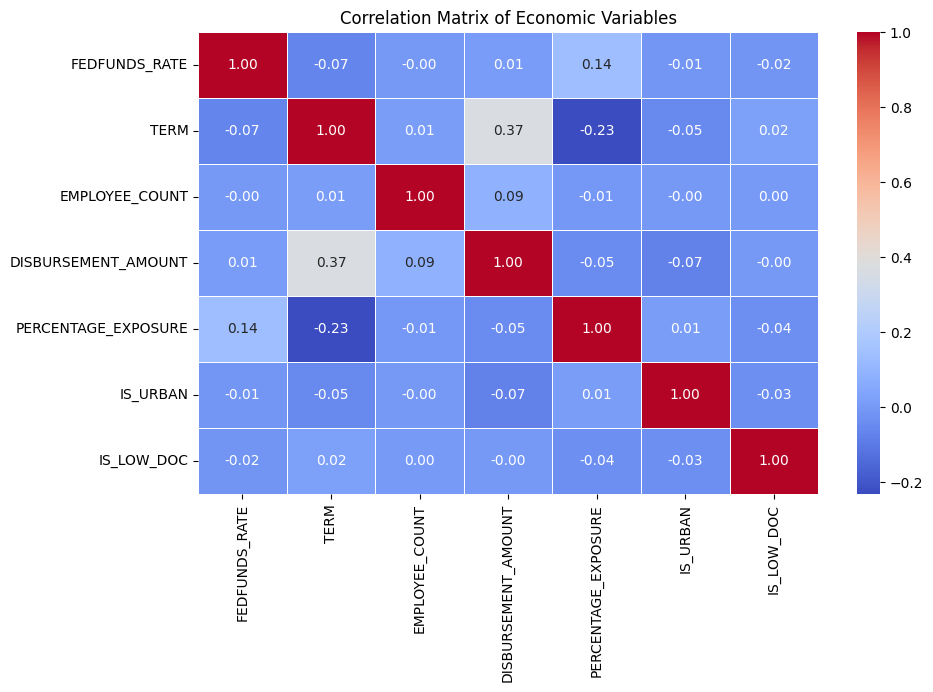

               Feature       VIF
0        FEDFUNDS_RATE  4.180723
1                 TERM  3.087845
2       EMPLOYEE_COUNT  1.044139
3  DISBURSEMENT_AMOUNT  1.593660
4  PERCENTAGE_EXPOSURE  2.504295
5             IS_URBAN  4.334349
6           IS_LOW_DOC  1.002669


In [ ]:
# Compute VIF

default_df
X = default_df[[
                'FEDFUNDS_RATE',
                'TERM',
                'EMPLOYEE_COUNT',
                'DISBURSEMENT_AMOUNT',
                'PERCENTAGE_EXPOSURE',
                ]]
X['IS_URBAN'] = default_df['IS_URBAN'].astype(int)
X['IS_LOW_DOC'] = default_df['IS_LOW_DOC'].astype(int)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

correlation_matrix = X.corr()

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Economic Variables")
plt.show()

# Display Results
print(vif_data)

In [ ]:
# Sample dataset (Replace with actual data)
np.random.seed(42)

# Define independent variables (X) and dependent variable (Y)
multi_analysis_df = default_df[[
    'FEDFUNDS_RATE',
    'TERM',
    'EMPLOYEE_COUNT',
    'DISBURSEMENT_AMOUNT',
    'PERCENTAGE_EXPOSURE'
]]
multi_analysis_df['IS_URBAN'] = default_df['IS_URBAN'].astype(int)
multi_analysis_df['IS_LOW_DOC'] = default_df['IS_LOW_DOC'].astype(int)
multi_analysis_df_target = default_df['CHARGE_OFF_AMOUNT']
multi_analysis_df_target = np.log(multi_analysis_df_target + 1)
multi_analysis_df_target = winsorize(multi_analysis_df_target, limits=[0.01, 0.01])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(multi_analysis_df, multi_analysis_df_target, test_size=0.3, random_state=5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for clarity and add original column names
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

model = sm.OLS(y_train, X_train_scaled).fit()


# Predict on test set
y_pred = model.predict(X_test_scaled)


# Evaluate the model
mse = np.mean((y_test - y_pred) ** 2)
r2 = model.rsquared

# Print results
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R²): {r2:.4f}')

# Print summary
print(model.summary())


Mean Squared Error (MSE): 0.6515
R-squared (R²): 0.4383
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     6905.
Date:                Tue, 04 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:03:08   Log-Likelihood:                -72048.
No. Observations:               61947   AIC:                         1.441e+05
Df Residuals:                   61939   BIC:                         1.442e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

C:\Users\kevin\AppData\Local\Temp\ipykernel_28732\1845321553.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_analysis_df['IS_URBAN'] = default_df['IS_URBAN'].astype(int)
C:\Users\kevin\AppData\Local\Temp\ipykernel_28732\1845321553.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_analysis_df['IS_LOW_DOC'] = default_df['IS_LOW_DOC'].astype(int)


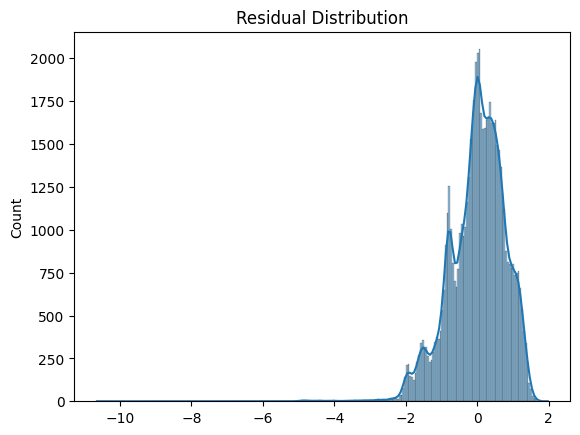

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

XGBoost Model Evaluation:
Mean Squared Error (MSE): 0.13
R-squared (R2): 0.88


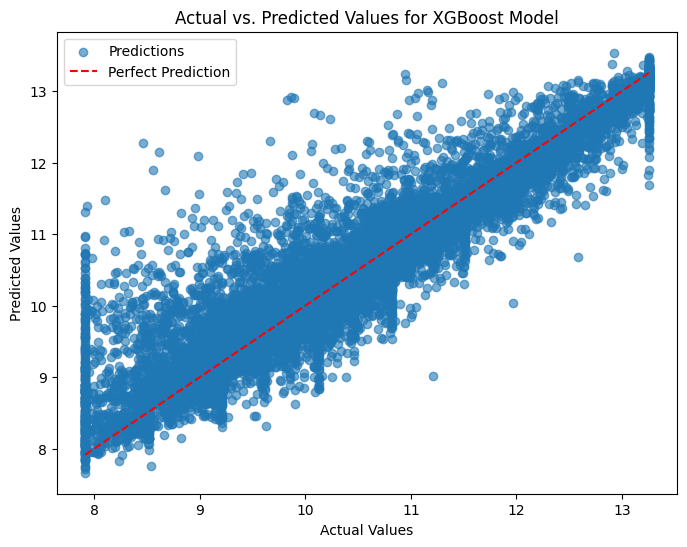

<Figure size 1000x800 with 0 Axes>

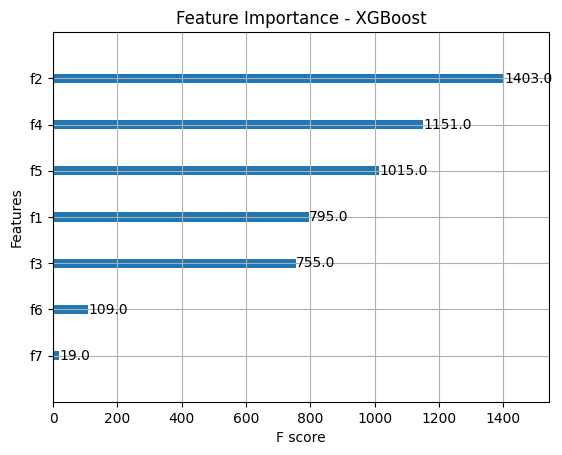

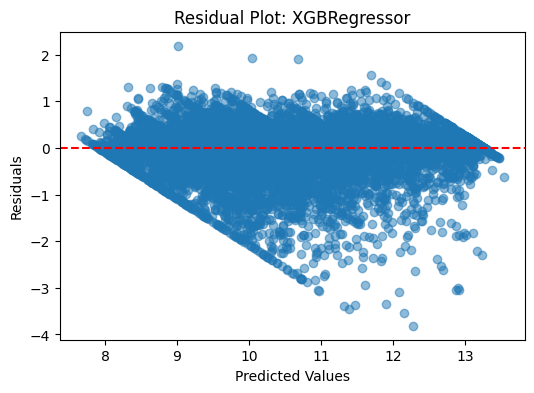

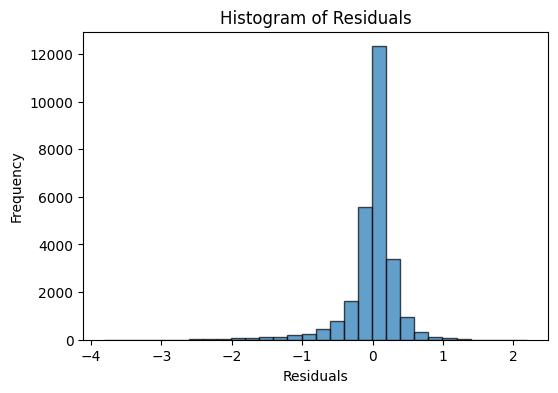

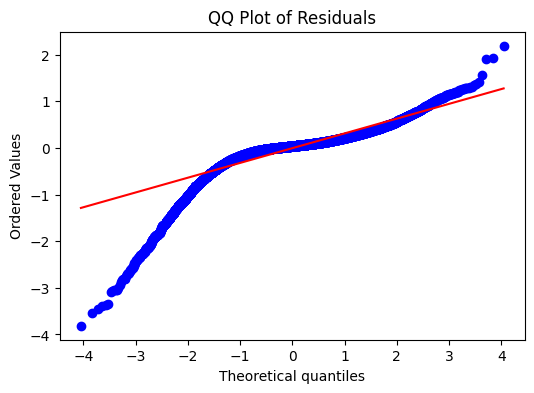

In [ ]:
# Train an XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display evaluation metrics
print("XGBoost Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"R-squared (R2): {r2_xgb:.2f}")

# Visualize actual vs. predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for XGBoost Model")
plt.legend()
plt.show()

# Optionally, display the feature importance as computed by XGBoost
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=10)  # adjust number of features as needed
plt.title("Feature Importance - XGBoost")
plt.show()


# Calculate residuals
residuals = y_test - y_pred_xgb

# Create residual plot
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_xgb, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot: XGBRegressor")
plt.show()

# Create histogram of residuals
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()


